<a href="https://colab.research.google.com/github/Aarid696/Python-Intern/blob/main/Minor_Project(IR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive'
CATEGORIES = ['Apple','Banana']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
   # print(img_array.shape)
  # print(img_array)
   # plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

<BarContainer object of 2 artists>

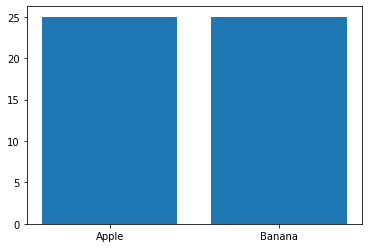

In [3]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

# split data into Traning and testing

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid) 
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [7]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [10]:
confusion_matrix(y_pred,y_test)

array([[6, 1],
       [0, 8]])

# Save the model using Pickel Library

In [11]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [12]:
model = pickle.load(open('img_model.p','rb'))

# Testing a brand new Image

enter urlhttps://www.itl.cat/pngfile/big/83-839251_ideas-fruit-images-apple-wallpaper-and-background-photos.jpg
(693, 693, 3)
 PREDICTED OUTPUT: Apple


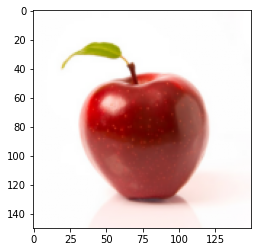

In [13]:
flat_data = []
url = input("enter url")
img = imread(url)
img_resized = resize(img,(150,150,3)) # normalizes
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [14]:
!pip install streamlit
!pip install pyngrok==4.1.1


     |████████████████████████████████| 7.5MB 4.2MB/s 
     |████████████████████████████████| 112kB 42.0MB/s 
     |████████████████████████████████| 163kB 41.9MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 4.6MB 45.4MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 122kB 45.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=23197d3483b9ff996967a5015cbb8ce889fe10b1d9d68193b9a84ed622629676
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15971 sha256=5938e0d3e1f70e955054857253074561227c9bd78236cd41e6c479c3c8ccf312
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [1]:
from pyngrok import ngrok

In [5]:
%%writefile app.py
import streamlit as st 
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using ML')
st.text('Upload image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("choose ", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    CATEGORIES = ['Apple','Banana']
    st.write("result")
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3)) # normalizes
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')

Overwriting app.py


In [3]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://61cd6df03930.ngrok.io'